In [14]:
import numpy as np
import matplotlib.pyplot as plt

### Loading data
We first load the problem data.

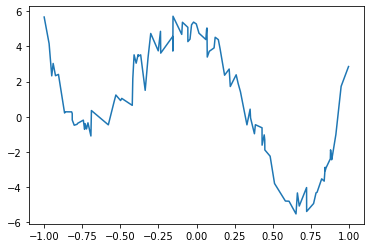

In [15]:
def load_data():
    xy = np.loadtxt('data/y_target.csv', delimiter=",")
    return xy[:,0],xy[:,1]

x,y = load_data()
plt.plot(x,y)

In [84]:
from numpy.polynomial import chebyshev as cheb

def generate_features(x, deg):
    '''This function generates a design matrix of features for each input point in x
    
    @param x: the input points
    @param deg: the maximum degree of the polynomial basis.
    @return : the design matrix X of dimensions NxD+1, so that the i-th row is the feature vector of the i-th input.
              Each value X_id = f_d(x_i) for the Chebyshev polynomial (of 1st kind) with degree d.
    '''
    coefs = np.linspace(1, deg+1, deg+1)
    something = cheb.Chebyshev.fit(x, y, deg=deg)
    #print(something)
    features = cheb.Chebyshev(something)
    #print(features)
    #for _ in range(deg+1):
        #features.append(np.polynomial.chebyshev.Chebyshev(coefs))

    return features

D = 4
X = generate_features(x, D)
#print(x)
#print(y)
#print(X)
print(X)
print(cheb.chebval(X, 3, tensor=True))

0.9630585783135404 - 2.0231247113168798 T_1(x) - 0.20367882701873 T_2(x) +
0.9556355759007689 T_3(x) + 3.7086835857232154 T_4(x)
3.0


In [ ]:

def fit(X,y):
    '''Learns the coefficients of each of the features in the provided matrix that best predicts y.
    @param X: the design matrix of features, one feature per row
    @param y: the vector of the dependent variable (labels)
    @return: vector of coefficients
    '''
    raise NotImplementedError()

def fit_cheb(x,y,D):
    '''Learns the coefficients of each of the features in the provided matrix that best predicts y.
    @param x: the input points
    @param D: maximum depgree of chebyshev polynomials
    @param y: the vector of the dependent variable (labels)
    @return: vector of coefficients
    '''
    raise NotImplementedError()
    
w = fit_cheb(x, y, D)
#Check the size of your results:
w, X.shape

: 

In [ ]:
from utilities import split_data

# Now generate a split of the full data into a taining/.testing dataset.
# The result is an object with named attributes x_trn, x_tst, t_trn, and y_tst.
data = split_data(x, y)

: 

In [ ]:
# Fit on the train data and evalute the RSS on the test data

def mse(y,y_pred):
    '''Compute the mean squared error of a prediction and its true label.
    @param y: vector of true labels
    @param y_hat: vector of predictions
    @return: the MSE
    '''
    raise NotImplementedError()
    
def evaluate_model_on_dataset(data, deg):
    '''Evaluate our model on the given training/testing set.
    @param data: The object holding the current split.
    @param deg: maximum depgree of chebyshev polynomials
    @return: the MSE of the predictions returned by the model learned on the training data
             as computed against on the testing labels.
    '''
    raise NotImplementedError()
    

: 

### Evaluation
We now evaluate our models for different degrees.

In [ ]:
degs = np.arange(15)
MSEs = np.r_[[evaluate_model_on_dataset(data, deg) for deg in degs]]

: 

In [ ]:
plt.bar(degs, MSEs)
plt.xlabel('Maximal Degree')
plt.ylabel('Mean Squared Error')

: 

In [ ]:
from utilities import split_data_around_point
data_ap = split_data_around_point(x, y, x_0=0.9)

: 

### Evaluation (splits)
We compare the effect of the two different splits on the generalisation error.

In [ ]:
MSEs_ap = np.r_[[evaluate_model_on_dataset(data_ap, deg) for deg in degs]]
plt.bar(degs+.2, MSEs, width=.4)
plt.bar(degs-.2, MSEs_ap, width=.4)
plt.xlabel('Maximal Degree')
plt.ylabel('Mean Squared Error')

: 